In [ ]:
# Import statements
import numpy as np
import math
import matplotlib.pyplot as plt

# Upload the 4 files to colab first

In [ ]:
# Load data from voronoi files
vor_points = np.loadtxt('vor_points.txt')
vor_points_34 = np.loadtxt('vor_points_34.txt')
vor_points_14 = np.loadtxt('vor_points_14.txt')
vor_points_half = np.loadtxt('vor_points_half.txt')


In [ ]:
# trim EACH file to the length of the smallest file
vor_points_half = np.loadtxt('vor_points_half.txt')
vor_points_half = vor_points_half[0:49439]
np.savetxt('vor_points_half.txt', vor_points_half)

In [ ]:
vor_points = vor_points[0:49439]
vor_points_34 = vor_points_34[0:49439]
vor_points_14 = vor_points_14[0:49439]


In [ ]:
# Save trimmed files back
np.savetxt('vor_points.txt', vor_points)
np.savetxt('vor_points_half.txt', vor_points_half)
np.savetxt('vor_points_14.txt', vor_points_14)
np.savetxt('vor_points_34.txt', vor_points_34)

# Upload paravt zip file to colab first then run

In [ ]:
!unzip paravt-master.zip

Archive:  paravt-master.zip
ae304fd45ac7a16c9a0a9fa46ab7e9c83fa737da
   creating: paravt-master/
  inflating: paravt-master/Changelog.txt  
  inflating: paravt-master/LICENSE   
  inflating: paravt-master/Makefile  
  inflating: paravt-master/README    
  inflating: paravt-master/config.h  
  inflating: paravt-master/func.c    
  inflating: paravt-master/func.h    
  inflating: paravt-master/iovt.c    
  inflating: paravt-master/iovt.h    
  inflating: paravt-master/paravt.c  
   creating: paravt-master/qhullsrc_r/
  inflating: paravt-master/qhullsrc_r/COPYING.txt  
  inflating: paravt-master/qhullsrc_r/geom2_r.c  
  inflating: paravt-master/qhullsrc_r/geom_r.c  
  inflating: paravt-master/qhullsrc_r/geom_r.h  
  inflating: paravt-master/qhullsrc_r/global_r.c  
  inflating: paravt-master/qhullsrc_r/io_r.c  
  inflating: paravt-master/qhullsrc_r/io_r.h  
  inflating: paravt-master/qhullsrc_r/libqhull_r.c  
  inflating: paravt-master/qhullsrc_r/libqhull_r.h  
  inflating: paravt-master/q

In [ ]:
%cd /content/paravt-master/ # you have to go into the paravt folder

/content/paravt-master


In [ ]:
# make sure to comment out MULTIMASS line in config.h before running
# also uncomment AUTOBORDER
!make

mpicc -c -O2 -fpic qhullsrc_r/user_r.c
mpicc -c -O2 -fpic qhullsrc_r/global_r.c
mpicc -c -O2 -fpic qhullsrc_r/stat_r.c
mpicc -c -O2 -fpic qhullsrc_r/io_r.c
mpicc -c -O2 -fpic qhullsrc_r/geom2_r.c
mpicc -c -O2 -fpic qhullsrc_r/poly2_r.c
mpicc -c -O2 -fpic qhullsrc_r/merge_r.c
mpicc -c -O2 -fpic qhullsrc_r/libqhull_r.c
mpicc -c -O2 -fpic qhullsrc_r/random_r.c
mpicc -c -O2 -fpic qhullsrc_r/geom_r.c
mpicc -c -O2 -fpic qhullsrc_r/poly_r.c
mpicc -c -O2 -fpic qhullsrc_r/qset_r.c
mpicc -c -O2 -fpic qhullsrc_r/mem_r.c
mpicc -c -O2 -fpic qhullsrc_r/userprintf_r.c
mpicc -c -O2 -fpic qhullsrc_r/usermem_r.c
ar r libqhull.a user_r.o global_r.o stat_r.o io_r.o geom2_r.o poly2_r.o merge_r.o libqhull_r.o random_r.o geom_r.o poly_r.o qset_r.o mem_r.o userprintf_r.o usermem_r.o
ar: creating libqhull.a
test -x /bin/ranlib -o -x /usr/bin/ranlib && ranlib libqhull.a
mpicc -c -O2 -fpic vars.c
mpicc -c -O2 -fpic func.c
mpicc -c -O2 -fpic iovt.c
iovt.c: In function ‘read_header_boxascii’:
iovt.c:59:7: warning:

## Make sure to add a row of 2 columns in the first line of the voronoi files
## Num. of Particles(for us its was 49439-not exactly 5e4) 
##   &    Lbox (for us its 2pi=6.283)

In [ ]:
# colab gives an erro for more than 2 CPUs so use <=2
!mpirun --allow-run-as-root -np 2 ./paravt vor_points_half.txt 0

Filename=vor_points_half.txt fileformat=0
BOX enabled.
PERIODIC enabled.
MULTIMASS disabled.
WRITEASCII enabled.
indices = 2 1 1
NumPart=49439  Lbox=   6.283
Task=  1 Npthistot=    23568
Task=  0 Npthistot=    25854
Read Complete: Nread=49422 in 1 blocks of 100000 bytes.
Border size=0.257238 , density=199.328079
Task=1 NumThis=23568 NumThis_boundary=8123
Task=0 NumThis=25854 NumThis_boundary=8264
Running VT with options: qhull v QJ p Fv
Task=1 N.facets=238337 N.vertices=206535 N.pointfacets=1954602 Max_neighbors=408
Dens Task=1 mass[ 3.4e+38  1.2e-38] vol=[ 3.2e-05      8.5] den=[    0.12  3.1e+04]
Task=0 N.facets=258228 N.vertices=223993 N.pointfacets=2119060 Max_neighbors=290
Neighbors complete.
Dens Task=0 mass[ 3.4e+38  1.2e-38] vol=[ 1.8e-05       15] den=[   0.066  5.5e+04]
Density and Volume complete.
Density write in file:vor_points_half.txt.den
Volume write in file:vor_points_half.txt.vol
write density...volumes...neighbors...
Neigbors write in file:vor_points_half.txt.nb
Neig

In [ ]:
vor_vol = np.loadtxt('vor_points_half.txt.vol')

In [ ]:
vor_vol = vor_vol[1:]

# Trim the files to exclude too large or too small volumes

In [ ]:
vor_vol_full = []
for i in range(len(vor_vol)):
  if vor_vol[i]>1e-100 and vor_vol[i]<1e3:
    vor_vol_full.append(vor_vol[i])

In [ ]:
vor_vol_half = []
for i in range(len(vor_vol)):
  if vor_vol[i]>1e-100 and vor_vol[i]<1e3:
    vor_vol_half.append(vor_vol[i])

In [ ]:
vor_vol_14 = []
for i in range(len(vor_vol)):
  if vor_vol[i]>1e-100 and vor_vol[i]<1e3:
    vor_vol_14.append(vor_vol[i])

In [ ]:
vor_vol_34 = []
for i in range(len(vor_vol)):
  if vor_vol[i]>1e-100 and vor_vol[i]<1e3:
    vor_vol_34.append(vor_vol[i])

In [ ]:
# Diagnostic to check all cells occupy ~(2pi)^3
np.sum(vor_vol_half)/(2*math.pi)**3

1.8301222706247717

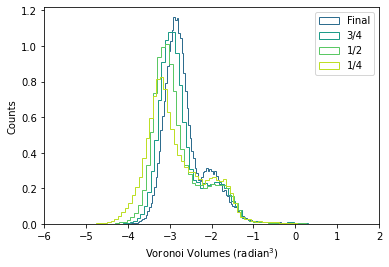

In [ ]:

# Plot Voronoi volumes histogram
#cm = plt.cm.get_cmap('RdYlBu')
cm=plt.cm.viridis
plt.hist(np.log10(vor_vol_full), bins = 500, histtype='step', density=True, label = 'Final', color=cm(90))
plt.hist(np.log10(vor_vol_14), bins = 500, histtype='step', density=True, label = '3/4', color=cm(140))
plt.hist(np.log10(vor_vol_half), bins = 500, histtype='step', density = True, label = '1/2', color=cm(190))
plt.hist(np.log10(vor_vol_34), bins = 500, histtype='step', density=True, label = '1/4', color=cm(230))
plt.xlim(-6,2)
#plt.ylim(0,60)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r"Voronoi Volumes (radian$^3$)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("voronoi_volumes.pdf")
plt.show()

# Visualize how Action Angle space actually looks like

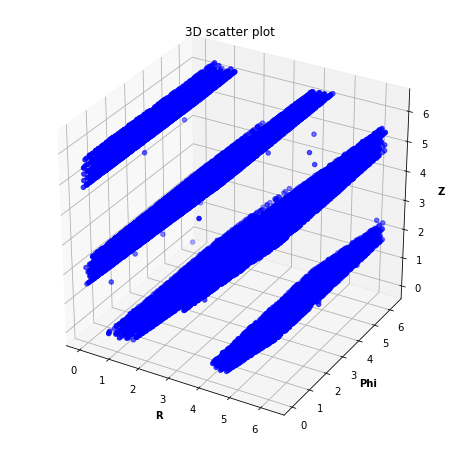

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(np.array(vor_points)[:,0], np.array(vor_points)[:,1], np.array(vor_points)[:,2], color = "blue")
plt.title("3D scatter plot")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('Phi', fontweight ='bold')
ax.set_zlabel('Z', fontweight ='bold')
 
# show plot
plt.show()